In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# .edges files from http://snap.stanford.edu/data/ego-Facebook.html
G = nx.read_edgelist("0.edges")
G.edges()

EdgeView([('236', '186'), ('236', '84'), ('236', '62'), ('236', '142'), ('236', '252'), ('236', '169'), ('236', '280'), ('236', '257'), ('236', '297'), ('236', '303'), ('236', '105'), ('236', '276'), ('236', '272'), ('236', '88'), ('236', '271'), ('236', '13'), ('236', '69'), ('236', '133'), ('236', '30'), ('236', '121'), ('236', '21'), ('236', '26'), ('236', '304'), ('236', '122'), ('236', '224'), ('236', '314'), ('236', '315'), ('236', '213'), ('236', '67'), ('236', '318'), ('236', '322'), ('236', '141'), ('236', '25'), ('236', '1'), ('236', '200'), ('236', '248'), ('186', '88'), ('186', '213'), ('186', '341'), ('186', '272'), ('186', '25'), ('186', '109'), ('186', '55'), ('186', '199'), ('186', '223'), ('186', '178'), ('186', '345'), ('186', '9'), ('186', '277'), ('186', '325'), ('186', '67'), ('186', '59'), ('186', '123'), ('186', '203'), ('186', '45'), ('186', '104'), ('186', '62'), ('186', '285'), ('186', '200'), ('186', '170'), ('186', '21'), ('186', '128'), ('186', '221'), ('18

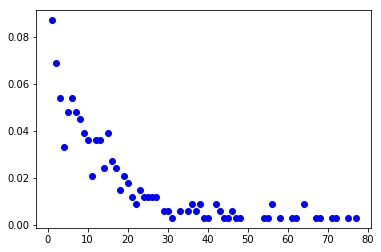

In [3]:
def calc_distr(G):
    degrees = []
    probs = []

    distr = {}
    for node in G.nodes():
        distr.setdefault(len(list(G.neighbors(node))), 0)
        distr[len(list(G.neighbors(node)))] += 1

    cnt = sum(distr.values())

    degrees = [i for i in distr.keys()]
    probs = [distr[i]/cnt for i in degrees]
    
    return degrees, probs

d, p = calc_distr(G)

plt.plot(d,p, 'bo')

clustering

In [4]:
def clust(G):
    counts = []
    
    for node in G.nodes():
        connections = 0
        set_of_neighbors = set(G.neighbors(node))
        
        for neighbor in set_of_neighbors:
            for neighbor_of_neighbor in G.neighbors(neighbor):
                if neighbor_of_neighbor in set_of_neighbors:
                    connections += 1

        counts.append([connections, len(set_of_neighbors)])
    
    coefficients_counts = {}
    for item in counts:
        if item[1] == 1:
            continue
        c = item[0]/(item[1]*(item[1]-1))
        coefficients_counts.setdefault(c, 0)
        coefficients_counts[c] += 1
        
    return coefficients_counts
        
    

In [5]:
coefficients_counts = clust(G)
from more_itertools import sort_together
x = [item[0] for item in coefficients_counts.items()]
y = [item[1] for item in coefficients_counts.items()]
sum_y = sum(y)
y_d = [i/sum_y for i in y]
x, y_d, y = sort_together([x,y_d, y])

(array([0.69078947, 0.16447368, 0.52631579, 1.48026316, 1.44736842,
        1.61184211, 1.01973684, 0.78947368, 0.92105263, 1.34868421]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

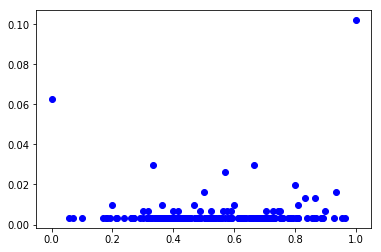

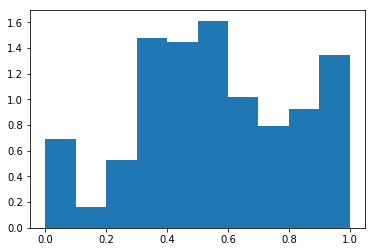

In [6]:
plt.plot(x,y_d,'bo')
plt.figure()
plt.hist([j for i in [[x]*y for x,y in zip(x,y)] for j in i], density=True)

Paths

In [7]:
def paths(G):
    sp = nx.shortest_path(G)

    dists = {}
    for node_paths in sp.values():
        for path in node_paths.values():
            dists.setdefault(len(path)-1,0)
            dists[len(path)-1] += 1

#     nodes = list(G.nodes())
    cnt = sum(dists.values())
    degrees = [i for i in dists.keys()]
    probs = [dists[i]/cnt for i in degrees]    
    return dists, degrees, probs

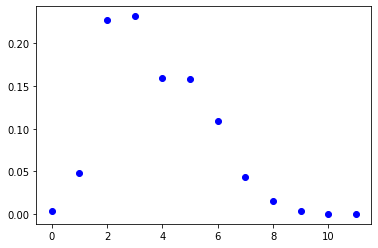

In [8]:
ps = list(paths(G))
plt.plot(ps[1], ps[2], 'bo')